In [1]:
# Familiar imports
import numpy as np
import pandas as pd

#Preprocess
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the plot_learning_curves class
from mlxtend.plotting import plot_learning_curves

In [2]:
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)

# Preview the data
train.head()
train.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [3]:
# Separate target from features
y = train['target']
features = train.drop(['target'], axis=1)

# Preview features
features.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992


In [4]:
#X and X_test ,X_valid data
X = features.copy()
X_test = test.copy()

#Any missing value?
X.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

In [5]:
#Split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

#Preview
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
412957,A,A,A,C,B,C,A,D,G,H,...,0.284988,0.777432,0.391158,0.575325,0.449008,0.808493,0.638874,0.620083,0.860327,0.796654
282449,A,A,A,C,B,B,A,E,E,I,...,0.979303,0.388542,0.392169,0.251943,0.257683,0.289205,0.753284,0.108515,0.223745,0.867225
164867,A,A,A,A,B,B,A,E,F,O,...,0.528495,0.877585,0.692778,0.394110,0.372842,0.603872,0.729337,0.572204,0.381617,0.528454
541,A,B,A,C,B,B,A,E,E,G,...,0.795973,0.254421,0.279979,0.244269,0.549558,0.318729,0.093974,0.428488,0.176486,0.250280
80790,B,B,A,C,B,D,A,E,A,I,...,0.809695,0.412479,0.345747,0.537579,1.023082,0.433388,0.814753,0.655539,0.923203,0.467355


In [6]:
#Select num col
num_col = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

#Select cat col with low Cardinality
low_cat_col = [col for col in X_train.columns if X_train[col].nunique() < 15 and X_train[col].dtype == "object"]

#Select cat col with high Cardinality
high_cat_col = [col for col in X_train.columns if X_train[col].nunique() >= 15 and X_train[col].dtype == "object"]

In [7]:
#Normalization on cont data
X_train_num = X_train[num_col].copy()
X_valid_num = X_valid[num_col].copy()
X_test_num = X_test[num_col].copy()

my_imputer_num = MinMaxScaler()
imputed_X_train_num = pd.DataFrame(my_imputer_num.fit_transform(X_train_num))
imputed_X_valid_num = pd.DataFrame(my_imputer_num.transform(X_valid_num))
imputed_X_test_num = pd.DataFrame(my_imputer_num.transform(X_test_num))

imputed_X_train_num.columns = X_train_num.columns
imputed_X_valid_num.columns = X_valid_num.columns
imputed_X_test_num.columns = X_test_num.columns

imputed_X_train_num.index = X_train.index
imputed_X_valid_num.index = X_valid.index
imputed_X_test_num.index = X_test.index

#Preview
#imputed_X_train_num.describe()
imputed_X_train_num.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,
412957,0.980413,0.521939,0.381293,0.451860,0.036373,0.715956,0.460894,0.448168,0.545391,0.798370,0.585906,0.556980,0.890675,0.855171
282449,0.570328,0.586554,0.891093,0.295605,0.904792,0.335339,0.461650,0.058113,0.398275,0.198043,0.699495,0.054867,0.283969,0.948650
164867,0.355444,0.381775,0.001193,0.019123,0.340940,0.813979,0.686622,0.229591,0.486825,0.561816,0.675720,0.509986,0.434432,0.499912
541,0.460027,0.024918,0.628882,0.121437,0.675490,0.204070,0.377688,0.048858,0.622708,0.232174,0.044917,0.368926,0.238928,0.131441
80790,0.667354,0.660526,0.249002,0.576490,0.692653,0.358766,0.426908,0.402640,0.986816,0.364726,0.760523,0.591782,0.950601,0.418979


In [8]:
#High cat data handling
X_train_high_cat = X_train[high_cat_col].copy()
X_valid_high_cat = X_valid[high_cat_col].copy()
X_test_high_cat = X_test[high_cat_col].copy()

my_ordinal_encoder = OrdinalEncoder()
ordinal_X_train_high_cat = pd.DataFrame(my_ordinal_encoder.fit_transform(X_train_high_cat))
ordinal_X_valid_high_cat = pd.DataFrame(my_ordinal_encoder.transform(X_valid_high_cat))
ordinal_X_test_high_cat = pd.DataFrame(my_ordinal_encoder.transform(X_test_high_cat))

ordinal_X_train_high_cat.columns = X_train_high_cat.columns
ordinal_X_valid_high_cat.columns = X_valid_high_cat.columns
ordinal_X_test_high_cat.columns = X_test_high_cat.columns

ordinal_X_train_high_cat.index = X_train.index
ordinal_X_valid_high_cat.index = X_valid.index
ordinal_X_test_high_cat.index = X_test.index

#Preview
ordinal_X_train_high_cat.head()
#ordinal_X_train_high_cat.describe()

,cat9
id,
412957,7.0
282449,8.0
164867,14.0
541,6.0
80790,8.0


In [9]:
#low cat data handling
X_train_low_cat = X_train[low_cat_col].copy()
X_valid_low_cat = X_valid[low_cat_col].copy()
X_test_low_cat = X_test[low_cat_col].copy()

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_low_cat))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid_low_cat))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_low_cat))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index
OH_cols_test.index = X_test.index

#Preview
OH_cols_train.head()
#OH_cols_train.isnull().sum()
#OH_cols_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
id,,,,,,,,,,,,,,,,,,,,,
412957,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
282449,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
164867,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
541,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80790,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Combine back
X_train_full = pd.concat([imputed_X_train_num, ordinal_X_train_high_cat,OH_cols_train], axis=1)
X_valid_full = pd.concat([imputed_X_valid_num, ordinal_X_valid_high_cat,OH_cols_valid], axis=1)
X_test_full = pd.concat([imputed_X_test_num, ordinal_X_test_high_cat,OH_cols_test], axis=1)

#Preview
X_train_full.head()
#X_train_full.describe()
#X_train_full.isnull().sum()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,31,32,33,34,35,36,37,38,39,40
id,,,,,,,,,,,,,,,,,,,,,
412957,0.980413,0.521939,0.381293,0.451860,0.036373,0.715956,0.460894,0.448168,0.545391,0.798370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
282449,0.570328,0.586554,0.891093,0.295605,0.904792,0.335339,0.461650,0.058113,0.398275,0.198043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
164867,0.355444,0.381775,0.001193,0.019123,0.340940,0.813979,0.686622,0.229591,0.486825,0.561816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
541,0.460027,0.024918,0.628882,0.121437,0.675490,0.204070,0.377688,0.048858,0.622708,0.232174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80790,0.667354,0.660526,0.249002,0.576490,0.692653,0.358766,0.426908,0.402640,0.986816,0.364726,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Detecting Multicollinearity using VIF -- no use
#def finding_vif(X):
#    vif = pd.DataFrame()
#    vif["variables"] = X.columns
#    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#    return(vif)

#finding_vif(X_train_full)

In [12]:
#Remove high VIF variable and then retest VIF
#X_train_full_VIF_Remove_v1 = X_train_full.copy()
#X_train_full_VIF_Remove_v1 = X_train_full_VIF_Remove_v1.iloc[:,0:15]

#X_train_full_VIF_Remove_v2 = X_train_full_VIF_Remove_v1.copy()
#X_train_full_VIF_Remove_v2 = X_train_full_VIF_Remove_v2.drop(['cont0', 'cont6','cont8','cont12'], axis=1)

#finding_vif(X_train_full_VIF_Remove_v2)

In [13]:
#Temp disable user warning when using XGBoost
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

#Random Grid Search
parameters_GS = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000], 
              'learning_rate':[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],
              'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'min_child_weight':[1,2,3,4,5,6,7,8,9,10,20,50,100],
              'lambda':[1,2,3,4,5,6,7,8,9,10,20,50,100,150,200],
              'alpha':[1,2,3,4,5,6,7,8,9,10,20,50,100,150,200],
              'gamma':[0,1,2,3,4,5,6,7,8,9,10,20,50,100],
              'max_delta_step':[0,1,2,3,4,5,6,7,8,9,10,20,50,100],
              'scale_pos_weight':[0,1,2,3,4,5,6,7,8,9,10,20,50,100]}

Param_combo = 2000
              
model_GS = XGBRegressor(random_state=1,tree_method = 'gpu_hist')
random_grid_search = RandomizedSearchCV(estimator=model_GS, param_distributions=parameters_GS, n_iter=Param_combo, 
                                        cv=5,scoring='neg_root_mean_squared_error', 
                                        verbose=False, random_state=1)

random_grid_search.fit(X_train_full, y_train,early_stopping_rounds=5, eval_set=[(X_valid_full, y_valid)], verbose=False)

print('\n All results:')
print(random_grid_search.cv_results_)
print('\n Best estimator:')
print(random_grid_search.best_estimator_)
print('\n Best score for %d-fold search with %d parameter combinations:' % (5, Param_combo))
print(random_grid_search.best_score_)
print('\n Best hyperparameters:')
print(random_grid_search.best_params_)

Thanks to https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [14]:
# Define the model 
model = XGBRegressor(n_estimators= 550,
                     learning_rate = 0.1,
                     min_child_weight = 15,
                     max_depth = 9,
                     subsample = 0.7,
                     colsample_bytree = 0.1,
                     reg_lambda = 150,
                     reg_alpha = 30,
                     scale_pos_weight = 10,
                     max_delta_step = 6,
                     gamma = 0,
                     random_state=1,tree_method = 'gpu_hist')

# Train the model
model.fit(X_train_full, y_train, early_stopping_rounds=5, eval_set=[(X_valid_full, y_valid)], verbose=False)

#Testing on X_valid
preds_valid = model.predict(X_valid_full)
print(mean_squared_error(y_valid, preds_valid, squared=False))

0.7206813873745805


([0.4923087974099313,
  0.4896237922467547,
  0.4942010392440595,
  0.4971067080985394,
  0.4966865913309827,
  0.49669605200817807,
  0.4971475353014804,
  0.49583008250314436,
  0.4970815550168224,
  0.49686945359423673],
 [0.5310089460080427,
  0.5263215127491768,
  0.5237232518208124,
  0.5231501892454139,
  0.5218480847434173,
  0.521329567012863,
  0.5202371271268231,
  0.5197651352347759,
  0.5196376313746502,
  0.5192959518834342])

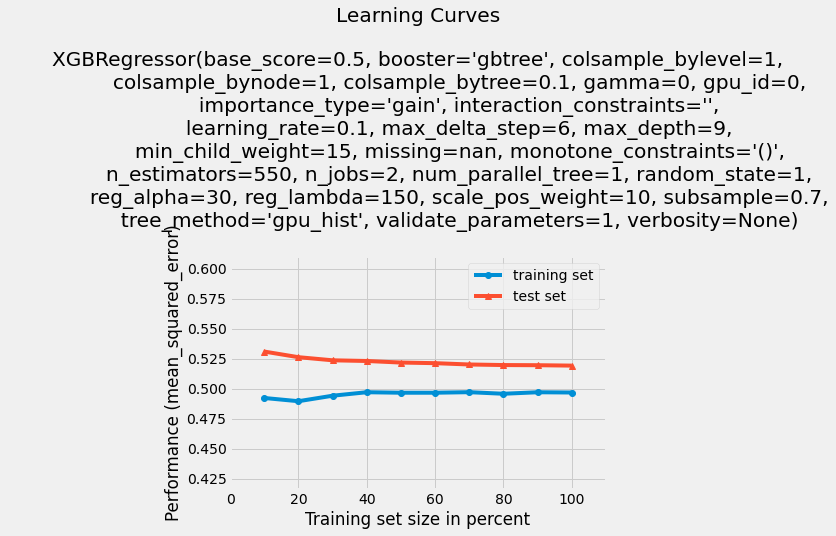

In [15]:
#Learning curve
plot_learning_curves(X_train_full, y_train, X_valid_full, y_valid, model, scoring='mean_squared_error')

In [16]:
# Use the model to generate predictions
predictions = model.predict(X_test_full)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': X_test_full.index,
                       'target': predictions})
output.to_csv('submission.csv', index=False)